In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util
from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.lenses.test import SampleStrongLens
from mejiro.exposure import Exposure

Computing on pixel grid of size 235x235 (5.17"x5.17") with pixel scale 0.022 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 5)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F129 band


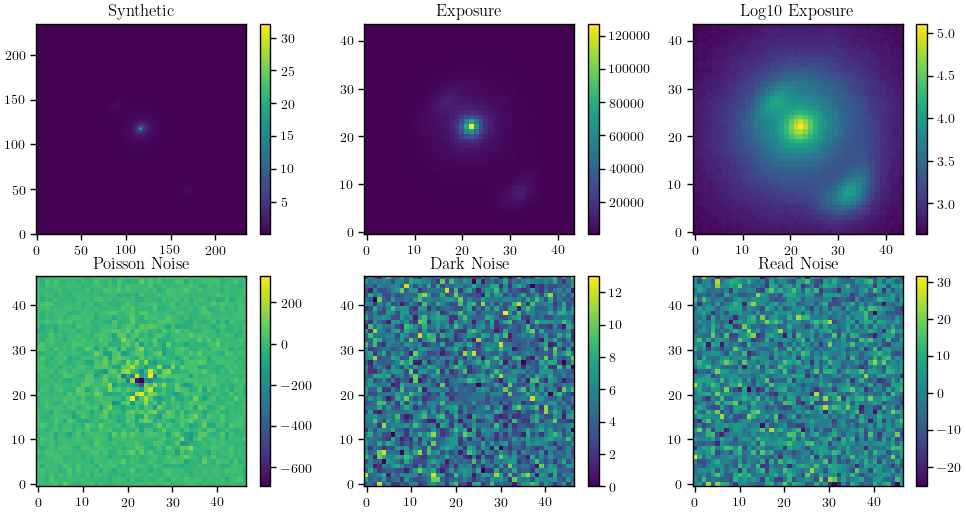

In [2]:
lens = SampleStrongLens()
roman = Roman()
band = 'F129'
scene_size = 5  # arcsec
oversample = 5
exposure_time = 1000
instrument_params = {
    'detector': 1,
    'detector_position': (2048, 2048)
}

synth_no_subhalo = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=oversample, pieces=False, verbose=True, instrument_params=instrument_params)
exposure_no_subhalo = Exposure(synth_no_subhalo, exposure_time=exposure_time, engine='galsim', verbose=True)

_, ax = plt.subplots(2, 3, figsize=(12, 6))
ax00 = ax[0,0].imshow(synth_no_subhalo.image)
ax01 = ax[0,1].imshow(exposure_no_subhalo.exposure)
ax02 = ax[0,2].imshow(np.log10(exposure_no_subhalo.exposure))
ax10 = ax[1,0].imshow(exposure_no_subhalo.poisson_noise.array)
ax11 = ax[1,1].imshow(exposure_no_subhalo.dark_noise.array)
ax12 = ax[1,2].imshow(exposure_no_subhalo.read_noise.array)
plt.colorbar(ax00, ax=ax[0,0])
plt.colorbar(ax01, ax=ax[0,1])
plt.colorbar(ax02, ax=ax[0,2])
plt.colorbar(ax10, ax=ax[1,0])
plt.colorbar(ax11, ax=ax[1,1])
plt.colorbar(ax12, ax=ax[1,2])
ax[0,0].set_title('Synthetic')
ax[0,1].set_title('Exposure')
ax[0,2].set_title('Log10 Exposure')
ax[1,0].set_title('Poisson Noise')
ax[1,1].set_title('Dark Noise')
ax[1,2].set_title('Read Noise')
plt.show()